# Importing Libraries

In [231]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import warnings 
warnings.filterwarnings('ignore')

# Getting the data 

In [232]:
tdf = pd.read_csv("titanic_train.csv")
tdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Analysis

In [233]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The training-set has 891 examples and 11 features + the target variable (survived). 2 of the features are floats, 5 are integers and 5 are objects. Below some features are listed with a short description:

**survival**:   Survival

**PassengerId**: Unique Id of a passenger. 

**pclass**:    Ticket class     

**sex**:    Sex     

**Age**:    Age in years     

**sibsp**:    spouses aboard the Titanic     

**parch**:    children aboard the Titanic     

**ticket**:    Ticket number     

**fare**:    Passenger fare     

**cabin**:    Cabin number     


In [234]:
tdf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above we can see that 38% out of the training-set survived the Titanic. We can also see that the passenger ages range from 0.4 to 80. 

In [235]:
tdf.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [236]:
total = tdf.isnull().sum().sort_values(ascending=False)
percent_1 = tdf.isnull().sum()/tdf.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


The **'Embarked'** feature has only 2 missing values, which can easily be filled. It will be much more tricky, to deal with the **‘Age’** feature, which has 177 missing values. We can drop **‘Cabin’** since 77 % of it are missing but it needs further investigation.

In [237]:
tdf.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

**Age and Sex**

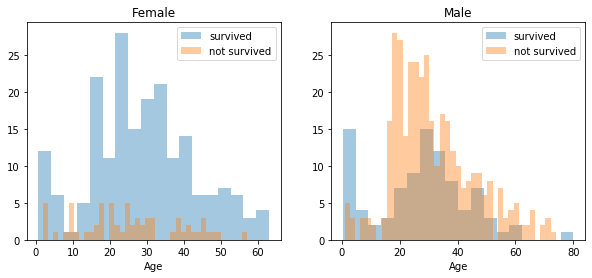

In [238]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = tdf[tdf['Sex']=='female']
men = tdf[tdf['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')



You can see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.
For men the probability of survival is very low between the age of 5 and 18, but that isn’t true for women. Another thing to note is that infants also have a little bit higher probability of survival

**Embarked, Pclass and Sex**

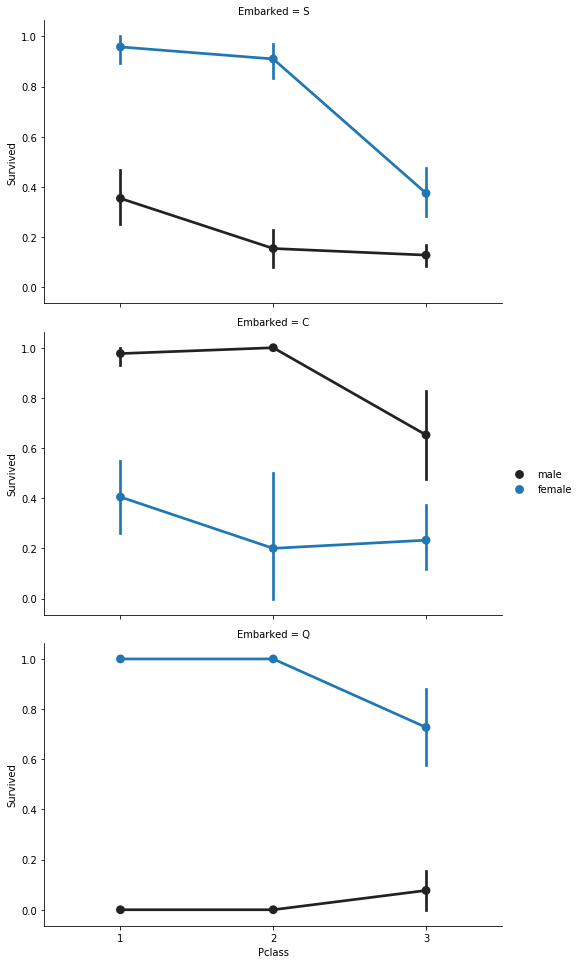

In [239]:
FacetGrid = sns.FacetGrid(tdf, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

**Embarked** seems to be correlated with **survival**, depending on the **gender**.
**Women** on port **Q** and on port **S** have a higher chance of **survival**. The inverse is true, if they are at port **C**. **Men** have a high survival probability if they are on port **C**, but a low probability if they are on port **Q** or **S**.
**Pclass** also seems to be correlated with **survival**. We will generate another plot of it below.

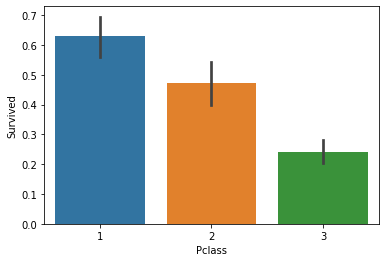

In [240]:
sns.barplot(x='Pclass', y='Survived', data=tdf)

**Pclass**

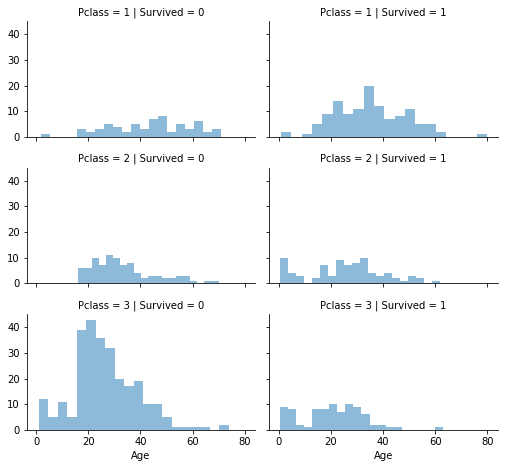

In [241]:
grid = sns.FacetGrid(tdf, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Here we see clearly, that **Pclass** is contributing to a persons chance of **survival**, especially if this person is in **class 1**. 

We will create another pclass plot below.

In [242]:
data = [tdf]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
tdf['not_alone'].value_counts()



1    537
0    354
Name: not_alone, dtype: int64

The plot above confirms our assumption about pclass 1, but we can also spot a high probability that a person in pclass 3 will not survive.

**SibSp and Parch:**

SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the Titanic. we will create it below and also a feature that sows if someone is not alone.

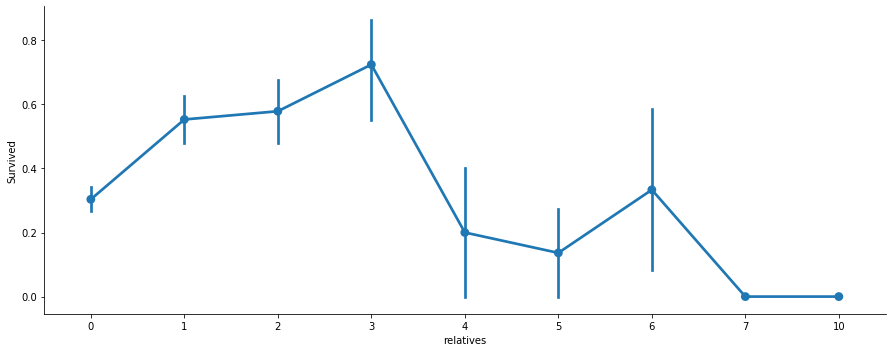

In [243]:
axes = sns.factorplot('relatives','Survived', data=tdf, aspect = 2.5, )

Here we can see that one has a high probabilty of **survival** with **1 to 3 realitves**, but a lower one if one has less than **1 or more than 3** (except for some cases with 6 relatives).

# Data Preprocessing 

First, we will drop ‘PassengerId’ from the dataframe because it does not contribute to a persons survival probability

In [244]:
tdf = tdf.drop(['PassengerId'], axis=1)

**Missing Data**

**Cabin**

A **cabin number** looks like **‘C123’** and the letter refers to the **deck**. Therefore we’re going to extract these and create a new feature, that contains a persons deck. Afterwords we will convert the feature into a numeric variable. The missing values will be converted to zero.

In [245]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [tdf]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
tdf = tdf.drop(['Cabin'], axis=1)


**Age**

Now we can tackle the issue with the age features missing values. We will create an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation and is_null

In [246]:
data = [tdf]

for dataset in data:
    mean = tdf["Age"].mean()
    is_null = dataset["Age"].isnull().sum()
    std = tdf["Age"].std()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = tdf["Age"].astype(int)
tdf["Age"].isnull().sum()


0

**Embarked**

Since the Embarked feature has only 2 missing values, we will just fill these with the most common one.

In [247]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [248]:
common_value = 'S'
data = [tdf]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)


In [249]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int32
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     891 non-null object
relatives    891 non-null int64
not_alone    891 non-null int32
Deck         891 non-null int32
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.2+ KB


We can see that 

**float** :    Fare

&

**categorical features**:   Name, Sex, Ticket and Embarked.

**Fare**

Converting “Fare” from float to int64, using the “astype()” function.

In [250]:
data = [tdf]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

**Name**

We will use the Name feature to extract the Titles from the Name, so that we can build a new feature out of that.

In [251]:
data = [tdf]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].map(titles)
    dataset['Title'] = dataset['Title'].fillna(0)
tdf = tdf.drop(['Name'], axis=1)



In [252]:
tdf

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,male,22,1,0,A/5 21171,7,S,1,0,8,1
1,1,1,female,38,1,0,PC 17599,71,C,1,0,3,3
2,1,3,female,26,0,0,STON/O2. 3101282,7,S,0,1,8,2
3,1,1,female,35,1,0,113803,53,S,1,0,3,3
4,0,3,male,35,0,0,373450,8,S,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,211536,13,S,0,1,8,5
887,1,1,female,19,0,0,112053,30,S,0,1,2,2
888,0,3,female,26,1,2,W./C. 6607,23,S,3,0,8,2
889,1,1,male,26,0,0,111369,30,C,0,1,3,1


**Sex**

Convert ‘Sex’ feature into numeric.

In [253]:
genders = {"male": 0, "female": 1}
data = [tdf]
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)


**Ticket**

In [254]:
tdf['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories. So we will drop it from the dataset.

In [255]:
tdf = tdf.drop(['Ticket'], axis=1)

**Embarked**

Convert ‘Embarked’ feature into numeric.

In [256]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [tdf]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

**Age**

Now we need to convert the ‘age’ feature. First we will convert it from float into integer. Then we will create the new ‘AgeGroup” variable, by categorizing every age into a group. Note that it is important to place attention on how you form these groups, since you don’t want for example that 80% of your data falls into group 1.

In [257]:
data = [tdf]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6
    

In [258]:
tdf['Age'].value_counts()

4    164
6    163
5    154
3    139
2    110
1     93
0     68
Name: Age, dtype: int64

**Fare**

For the ‘Fare’ feature, we need to do the same as with the ‘Age’ feature.

In [259]:
data = [tdf]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)
tdf['Fare'].value_counts()

0    241
2    223
1    216
3    158
4     44
5      9
Name: Fare, dtype: int64

**Creating new Features**

We will add two new features to the dataset, that I compute out of other features.

**1. Age times Class**

In [260]:
data = [tdf]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

**2. Fare per Person**

In [261]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [262]:
tdf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1


**Machine Learning Models**

We will train several Machine Learning models and compare their results.

In [263]:
X= tdf.drop("Survived", axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,5,1,0,3,0,1,0,3,3,5,1
4,3,0,5,0,0,1,0,0,1,8,1,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,3,0,0,1,0,0,1,8,5,6,1
887,1,1,2,0,0,2,0,0,1,2,2,2,2
888,3,1,3,1,2,2,0,3,0,8,2,9,0
889,1,0,3,0,0,2,1,0,1,3,1,3,2


In [264]:
y = tdf["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

**Finding Best Random State**

In [265]:
maxAccu=0
maxRS=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=i)
    RF=RandomForestClassifier()
    RF.fit(x_train,y_train)
    predrf=RF.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)
    

Best accuracy is  0.8656716417910447 on random state  49


Here we can find the best random state is 74 .

In [266]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=.30,random_state=62)

In [267]:
print("X_train.shape" , X_train.shape)
print("X_test.shape" , X_test.shape)
print("Y_train.shape" , Y_train.shape)
print("Y_test.shape" , Y_test.shape)

X_train.shape (623, 13)
X_test.shape (268, 13)
Y_train.shape (623,)
Y_test.shape (268,)


**Random Forest**

In [268]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(acc_random_forest) 


92.3


**Logistic Regression**

In [269]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(acc_log)

81.7


**K Nearest Neighbor**

In [270]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(acc_knn)

86.36


**Gaussian Naive Bayes**

In [271]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print(acc_gaussian)

78.01


**Linear Support Vector Machine**

In [272]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(acc_linear_svc)

81.06


**Decision Tree**

In [273]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(acc_decision_tree)

92.3


**Finding Best Model**

In [274]:
results = pd.DataFrame({
'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',
              'Decision Tree'],
'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
92.30,Random Forest
92.30,Decision Tree
86.36,KNN
81.70,Logistic Regression
81.06,Support Vector Machines
78.01,Naive Bayes


As we can see, the Random Forest classifier goes on the first place.

**K-Fold Cross Validation**

The code below perform K-Fold Cross Validation on our random forest model, using 10 folds (K = 10). Therefore it outputs an array with 10 different scores

In [275]:
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.80952381 0.71428571 0.82539683 0.85714286 0.6984127  0.80952381
 0.77419355 0.81967213 0.85245902 0.7704918 ]
Mean: 0.7931102213492482
Standard Deviation: 0.050950551167342366


This looks much more realistic than before. Our model has a average accuracy of 78% with a standard deviation of 5 %. The standard deviation shows us, how precise the estimates are .
This means in our case that the accuracy of our model can differ (+ — 5%).
We will try to increase it’s performance even further in the following section

**Feature Importance**

Another great quality of random forest is that they make it very easy to measure the relative importance of each feature. Sklearn measures a feature importance by looking at how much the tree nodes uses that feature, reduced impurity on average (across all trees in the forest). It computes this score automatically for each feature after training and scales the results so that the sum of all importances is equal to 1.

In [276]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.195
Sex,0.152
Age_Class,0.113
Age,0.087
Pclass,0.076
Deck,0.071
Fare,0.068
relatives,0.059
Embarked,0.057


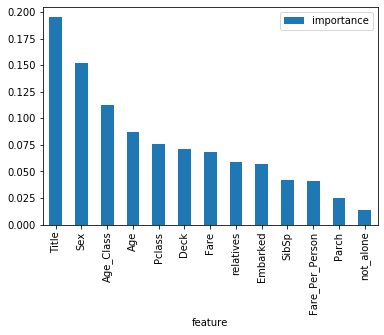

In [277]:
importances.plot.bar()

**not_alone** and **Parch** doesn’t play a significant role in our random forest classifiers prediction process. Because of that we will drop them from the dataset and train the classifier again.

In [278]:
tdf  = tdf.drop("not_alone", axis=1)
tdf  = tdf.drop("Parch", axis=1)

In [279]:
tdf

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked,relatives,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,1,8,1,6,0
1,1,1,1,5,1,3,1,1,3,3,5,1
2,1,3,1,3,0,0,0,0,8,2,9,0
3,1,1,1,5,1,3,0,1,3,3,5,1
4,0,3,0,5,0,1,0,0,8,1,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,3,0,1,0,0,8,5,6,1
887,1,1,1,2,0,2,0,0,2,2,2,2
888,0,3,1,3,1,2,0,3,8,2,9,0
889,1,1,0,3,0,2,1,0,3,1,3,2


In [280]:
X= tdf.drop("Survived", axis=1)
X

,Pclass,Sex,Age,SibSp,Fare,Embarked,relatives,Deck,Title,Age_Class,Fare_Per_Person
0,3,0,2,1,0,0,1,8,1,6,0
1,1,1,5,1,3,1,1,3,3,5,1
2,3,1,3,0,0,0,0,8,2,9,0
3,1,1,5,1,3,0,1,3,3,5,1
4,3,0,5,0,1,0,0,8,1,15,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,3,0,1,0,0,8,5,6,1
887,1,1,2,0,2,0,0,2,2,2,2
888,3,1,3,1,2,0,3,8,2,9,0
889,1,0,3,0,2,1,0,3,1,3,2


In [281]:
y = tdf["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [282]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=.30,random_state=62)
print("X_train.shape" , X_train.shape)
print("X_test.shape" , X_test.shape)
print("Y_train.shape" , Y_train.shape)
print("Y_test.shape" , Y_test.shape)

X_train.shape (623, 11)
X_test.shape (268, 11)
Y_train.shape (623,)
Y_test.shape (268,)


**Training random forest again**

**Random Forest**

In [283]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.3 %


Our random forest model predicts as good as it did before. A general rule is that, the more features we have, the more likely our model will suffer from overfitting and vice versa. 

In [284]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 79.61 %


We will use out-of-bag samples to estimate the generalization accuracy

# Hyperparameter Tuning

In [285]:
param_grid = { "criterion" : ["gini", "entropy"], 
              "min_samples_leaf" : [1, 5, 10, 25, 50, 70], 
              "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], 
              "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)
clf.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 35,
 'n_estimators': 100}

**Testing new Parameters**

**Random Forest**

In [286]:
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 81.22 %


Now that we have a proper model, we can start evaluating it’s performace in a more accurate way. Previously we only used accuracy and the oob score, which is just another form of accuracy.

**Confusion Matrix:**

In [287]:
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[325,  52],
       [ 79, 167]], dtype=int64)

The first row is about the not-survived-predictions. 327 passengers were correctly classified as not survived (called true negatives) and 50 where wrongly classified as not survived (false positives).
The second row is about the survived-predictions: 73 passengers where wrongly classified as survived (false negatives) and 173 where correctly classified as survived (true positives).

In [288]:
# Precision and Recall:
print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.7625570776255708
Recall: 0.6788617886178862


Our model predicts 77% of the time, a passengers survival correctly (precision). The recall tells us that it predicted the survival of 71 % of the people who actually survived

**F1 Score**

The F-score is computed with the harmonic mean of precision and recall. Note that it assigns much more weight to low values. As a result of that, the classifier will only get a high F-score, if both recall and precision are high

In [289]:
f1_score(Y_train, predictions)

0.718279569892473

There we have it, a 73 % F-score. The score is not that high, because we have a recall of 71%. But unfortunately the F-score is not perfect, because it favors classifiers that have a similar precision and recall. This is a problem, because you sometimes want a high precision and sometimes a high recall. The thing is that an increasing precision, sometimes results in an decreasing recall and vice versa (depending on the threshold). This is called the **precision/recall tradeoff.**

**Precision Recall Curve**

For each person the Random Forest algorithm has to classify, it computes a probability based on a function and it classifies the person as survived (when the score is bigger the than threshold) or as not survived (when the score is smaller than the threshold). That’s why the threshold plays an important part.
We will plot the precision and recall with the threshold using matplotlib:

Getting the probabilities of our predictions

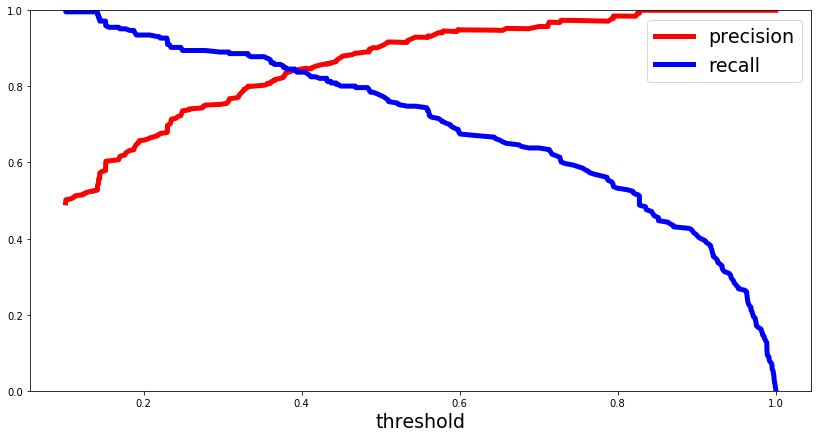

In [290]:
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

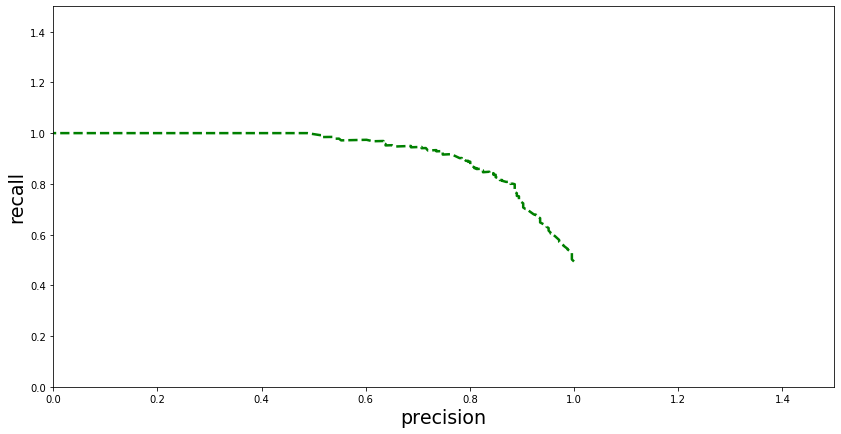

In [291]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

Compute true positive rate and false positive rate

**Roc_Auc Curve**

This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall.

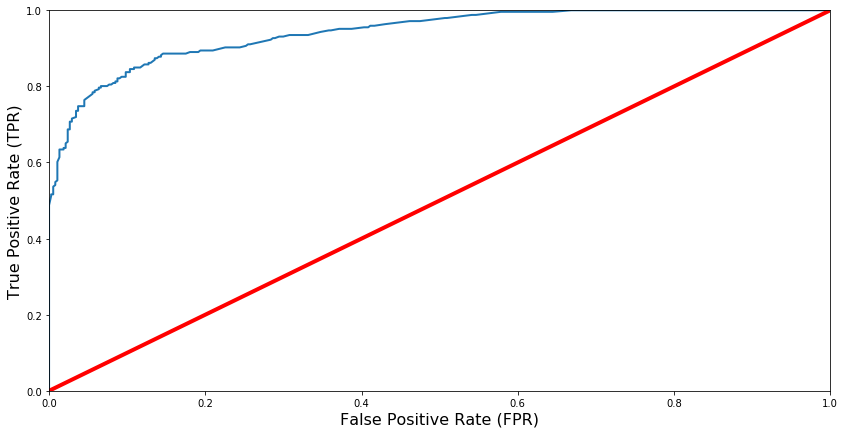

In [292]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

The red line in the middel represents a purely random classifier (e.g a coin flip) and therefore your classifier should be as far away from it as possible. Our Random Forest model seems to do a good job.

**ROC_AUC Score**

The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the curve, which is called AUC.
A classifiers that is 100% correct, would have a ROC AUC Score of 1 and a completely random classiffier would have a score of 0.5.

In [293]:
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9414882146168941


In [294]:
t1 = np.array([3,0,2,1,0,0,1,8,1,6,0])
t1 = t1.reshape(1,-1)
random_forest.predict(t1)

array([0], dtype=int64)